📊 Loading data...
✅ Data loaded!

Creating temporal analysis...

📊 Temporal Insights:
   Peak Activity Hour: 18:00 UTC
   Most Viral Post: GOP: Guardian of Pedophiles...
   Date Range: 2015-07-15 to 2025-09-29

✅ Part 3 Complete! Run part 4 next for the executive dashboard.


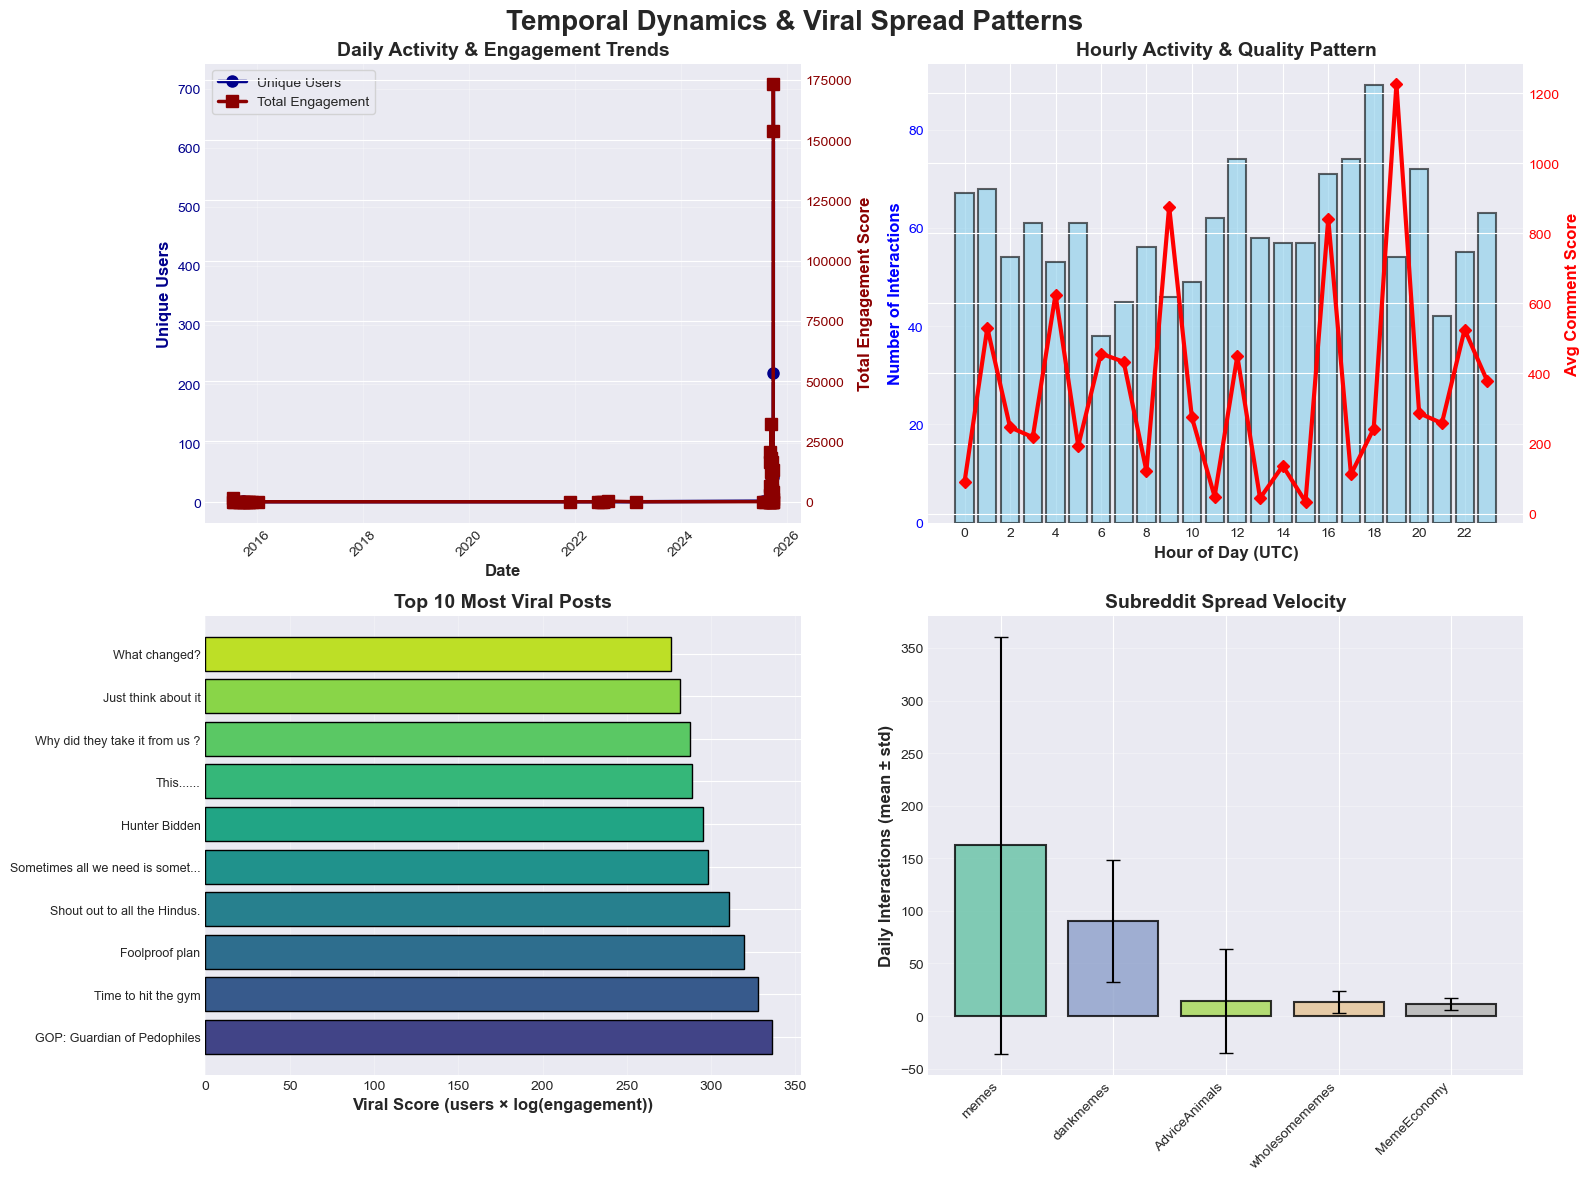

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

"""
PART 3: TEMPORAL & VIRAL SPREAD ANALYSIS
----------------------------------------
Analyzes time-based patterns and viral content
"""

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("📊 Loading data...")
df_detailed = pd.read_csv('reddit_interactions_detailed.csv')

# Clean data
df_detailed = df_detailed.dropna(subset=['user'])
df_detailed = df_detailed[df_detailed['user'] != 'None']
df_detailed['user'] = df_detailed['user'].astype(str)
df_detailed['timestamp'] = pd.to_datetime(df_detailed['timestamp'])
df_detailed['hour'] = df_detailed['timestamp'].dt.hour
df_detailed['date'] = df_detailed['timestamp'].dt.date

print("✅ Data loaded!\n")

# ========================================
# FIGURE 3: TEMPORAL & VIRAL (4 panels)
# ========================================
print("Creating temporal analysis...")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Dynamics & Viral Spread Patterns', fontsize=20, fontweight='bold')

# Panel 1: Daily Activity Timeline
ax = axes[0, 0]
daily_stats = df_detailed.groupby('date').agg({
    'user': 'nunique',
    'post_id': 'nunique',
    'comment_score': 'sum'
}).reset_index()

ax2 = ax.twinx()
line1 = ax.plot(daily_stats['date'], daily_stats['user'], marker='o', linewidth=2.5, 
                label='Unique Users', color='darkblue', markersize=8)
line2 = ax2.plot(daily_stats['date'], daily_stats['comment_score'], marker='s', linewidth=2.5,
                 label='Total Engagement', color='darkred', markersize=8)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Unique Users', fontsize=12, fontweight='bold', color='darkblue')
ax2.set_ylabel('Total Engagement Score', fontsize=12, fontweight='bold', color='darkred')
ax.set_title('Daily Activity & Engagement Trends', fontsize=14, fontweight='bold')
ax.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkred')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='upper left', frameon=True, fancybox=True)

# Panel 2: Hourly Engagement Pattern
ax = axes[0, 1]
hourly = df_detailed.groupby('hour').agg({
    'user': 'count',
    'comment_score': 'mean'
}).reset_index()

ax2 = ax.twinx()
bars = ax.bar(hourly['hour'], hourly['user'], alpha=0.6, color='skyblue', 
              edgecolor='black', linewidth=1.5, label='Interactions')
line = ax2.plot(hourly['hour'], hourly['comment_score'], color='red', marker='D', 
                linewidth=3, markersize=6, label='Avg Score')

ax.set_xlabel('Hour of Day (UTC)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Interactions', fontsize=12, fontweight='bold', color='blue')
ax2.set_ylabel('Avg Comment Score', fontsize=12, fontweight='bold', color='red')
ax.set_title('Hourly Activity & Quality Pattern', fontsize=14, fontweight='bold')
ax.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
ax.set_xticks(range(0, 24, 2))
ax.grid(axis='y', alpha=0.3)

# Panel 3: Top Viral Posts
ax = axes[1, 0]
post_engagement = df_detailed.groupby('post_title').agg({
    'user': 'nunique',
    'comment_score': 'sum'
}).reset_index()
post_engagement['viral_score'] = post_engagement['user'] * np.log1p(post_engagement['comment_score'])
top_posts = post_engagement.nlargest(10, 'viral_score')

titles = [t[:30] + '...' if len(t) > 30 else t for t in top_posts['post_title']]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(titles)))
bars = ax.barh(range(len(titles)), top_posts['viral_score'], color=colors, 
               edgecolor='black', linewidth=1)
ax.set_yticks(range(len(titles)))
ax.set_yticklabels(titles, fontsize=9)
ax.set_xlabel('Viral Score (users × log(engagement))', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Most Viral Posts', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Panel 4: Spread Velocity by Subreddit
ax = axes[1, 1]
subreddit_temporal = df_detailed.groupby(['target_subreddit', 'date']).size().reset_index(name='count')
spread_velocity = subreddit_temporal.groupby('target_subreddit')['count'].agg(['mean', 'std']).reset_index()
spread_velocity = spread_velocity.sort_values('mean', ascending=False)

x = np.arange(len(spread_velocity))
bars = ax.bar(x, spread_velocity['mean'], yerr=spread_velocity['std'], 
              capsize=5, color=plt.cm.Set2(np.linspace(0, 1, len(spread_velocity))),
              edgecolor='black', linewidth=1.5, alpha=0.8)
ax.set_xticks(x)
ax.set_xticklabels([s.replace('r/', '') for s in spread_velocity['target_subreddit']], 
                    rotation=45, ha='right')
ax.set_ylabel('Daily Interactions (mean ± std)', fontsize=12, fontweight='bold')
ax.set_title('Subreddit Spread Velocity', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
# plt.savefig('03_temporal_viral_spread.png', dpi=300, bbox_inches='tight')
# print("✅ Saved: 03_temporal_viral_spread.png")

# ========================================
# TEMPORAL STATS
# ========================================
print("\n📊 Temporal Insights:")
peak_hour = hourly['hour'].iloc[hourly['user'].argmax()]
print(f"   Peak Activity Hour: {peak_hour}:00 UTC")
print(f"   Most Viral Post: {top_posts.iloc[0]['post_title'][:50]}...")
print(f"   Date Range: {df_detailed['date'].min()} to {df_detailed['date'].max()}")

print("\n✅ Part 3 Complete! Run part 4 next for the executive dashboard.")